In [39]:
import numpy as np
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

In [40]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/PrzemyslawSarnacki/AirQualityPrediction/master/data/first_data.csv')

<AxesSubplot:xlabel='Date'>

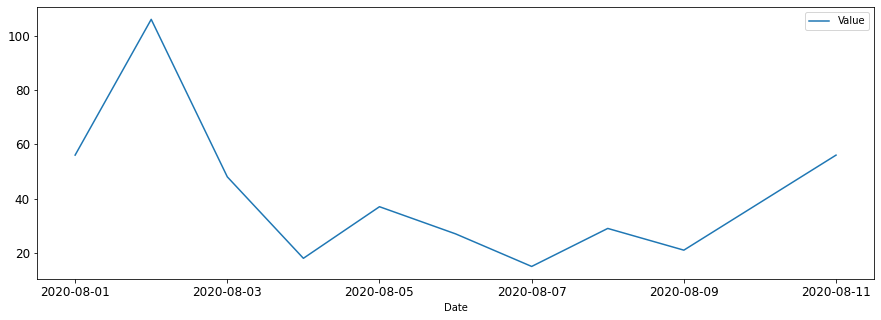

In [41]:
dataframe['Date'] = pd.to_datetime(dataframe['Date']).dt.date
dataframe = dataframe.drop_duplicates(subset=['Date'])
dataframe.plot(x='Date', y='Value', kind='line', fontsize=12)
